# Data Analysis of Hacker News Website

This notebook analyzes posts on Hacker News. The data can be found [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts). The data set contains one year of posts up to September 26, 2016.

## Goals
Analyze the comments below posts.

### Setup

In [2]:
# Make data import from path easy on any machine 

import os
from config.definitions import ROOT_DIR
# print(os.path.join(ROOT_DIR, "data", "HN_posts_year_to_Sep_26_2016.csv"))
path = os.path.join(ROOT_DIR, "data", "HN_posts_year_to_Sep_26_2016.csv")

/home/simon/Schreibtisch/dataquest/hacker_news


Read in the data:

In [3]:
import csv
with open(path) as hacker_news:
    hacker_texts = csv.reader(hacker_news)
    hn = list(hacker_texts)


Inspection of first five rows:

In [4]:
print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16']]


We analyze what drives comments below posts. In a first step, we get an understanding of the distribution of comments below posts.

In [5]:
comments_freq = {}

for row in hn[1:]:
    comment = row[4]
    if comment not in comments_freq:
        comments_freq[comment] = 1
    else:
        comments_freq[comment] += 1

comments_freq_int = {int(key):value for key, value in comments_freq.items()}
comments_freq_sorted = dict(sorted(comments_freq_int.items()))
print(comments_freq_sorted)

total_comments = sum(comments_freq_sorted.values())
print(total_comments)

{0: 212718, 1: 28055, 2: 9731, 3: 5016, 4: 3272, 5: 2208, 6: 1787, 7: 1390, 8: 1115, 9: 1064, 10: 962, 11: 846, 12: 726, 13: 631, 14: 626, 15: 560, 16: 550, 17: 514, 18: 524, 19: 485, 20: 435, 21: 448, 22: 396, 23: 348, 24: 375, 25: 343, 26: 355, 27: 320, 28: 302, 29: 290, 30: 309, 31: 271, 32: 315, 33: 260, 34: 230, 35: 273, 36: 229, 37: 262, 38: 234, 39: 244, 40: 238, 41: 239, 42: 235, 43: 239, 44: 233, 45: 253, 46: 211, 47: 212, 48: 212, 49: 213, 50: 215, 51: 204, 52: 218, 53: 207, 54: 192, 55: 197, 56: 186, 57: 186, 58: 179, 59: 192, 60: 168, 61: 154, 62: 182, 63: 163, 64: 164, 65: 157, 66: 162, 67: 149, 68: 147, 69: 166, 70: 135, 71: 131, 72: 135, 73: 119, 74: 115, 75: 139, 76: 114, 77: 131, 78: 104, 79: 109, 80: 116, 81: 114, 82: 106, 83: 113, 84: 120, 85: 99, 86: 93, 87: 106, 88: 89, 89: 84, 90: 94, 91: 88, 92: 93, 93: 85, 94: 90, 95: 79, 96: 86, 97: 61, 98: 79, 99: 83, 100: 76, 101: 68, 102: 59, 103: 66, 104: 68, 105: 76, 106: 68, 107: 59, 108: 67, 109: 75, 110: 63, 111: 53, 11

What is the share of posts that received 0 comments?

In [7]:
share_zero_comments = comments_freq["0"] / total_comments
print(share_zero_comments)

0.7257052596385768


Let's visualize the share of posts with and without comments:

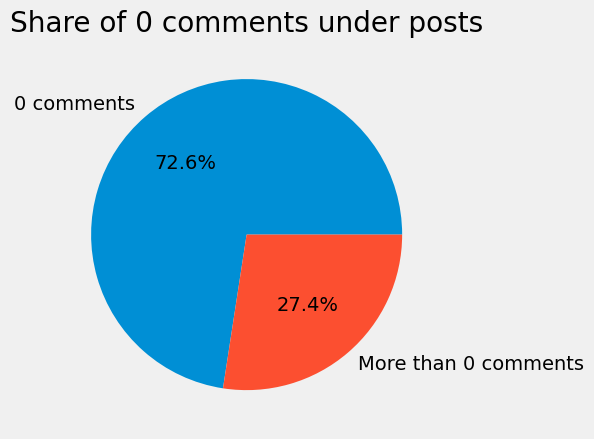

In [40]:
import matplotlib.pyplot as plt
import matplotlib.style as style

# create dictionary
data = {'0 comments': share_zero_comments, 'More than 0 comments': (1 - share_zero_comments)}

# for the looks
style.use("fivethirtyeight")

# create pie chart
plt.pie(data.values(), labels=data.keys(),autopct='%1.1f%%')

# add a legend
# plt.legend(data.keys(), bbox_to_anchor=(1.3,0.8), loc="upper right", bbox_transform=plt.gcf().transFigure)

plt.title('Share of 0 comments under posts')
plt.show()

In what follows we will focus on the analysis of posts that have received comments. To this end we select the appropriate data and save it as a new variable. Similarly, we will separate out the column names of the data set's variables.

In [20]:
headers = hn[0]
hn_data = hn[1:]
print(hn_data[:5])

hn_data_comments = [item for item in hn_data if item[4] != "0"]
print((total_comments - comments_freq["0"]) == len(hn_data_comments))

[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19'], ['12578989', 'algorithmic music', 'http://cacm.acm.org/magazines/2011/7/109891-algorithmic-composition/fulltext', '1', '0', 'poindontcare', '9/26/2016 3:16'], ['12578979', 'How the Data Vault Enables the Next-Gen Data Warehouse and Data Lake', 'https://www.talend.com/blog/2016/05/12/talend-and-Â\x93the-data-vaultÂ\x94', '1', '0', 'markgainor1', '9/26/2016 3:14']]
True


### Ask HN and Shown HN posts

Now that we have loaded and prepared the data, we want to analyze two particular type of posts in the forum: `Ask HN` and `Show HN`.

`Ask HN` posts pose a question to the Hacker News community.
`Show HN` posts present something to the community that is potentially interesting such as projects or products.

As a sales, marketing, business development, strategy or communication person one might be interested in finding out which type of post elicits more user interaction measured in comments. Specifically,
+ Do `Ask HN` or `Show HN` posts receive more comments?
+ Does the time of day a post was created have an influence on the amount of comments?

Let's separate out the different posts:

In [21]:
ask_posts = []
show_posts = []
other_posts = []

for post in hn_data_comments:
    title = post[1]
    if title.lower().startswith("ask hn"):
        ask_posts.append(title)
    elif title.lower().startswith("show hn"):
        show_posts.append(title)
    else:
        other_posts.append(title)

print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

6911
5059
68431


Do `Ask` or `Show` posts receive more comments on average?